In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import xarray as xr

In [4]:
diri_csv = '/perm/nklm/Px_flashdroughts/ERA5_FD_events/'
fili_csv = 'Rhine_SMI-7_w28_j20_e15.csv'

In [2]:
def get_info_from_filename(fili):
    '''
    Purpose: string splitting to extract some information from the input file name.

    Input: File name of CSV file with all variations in it (string)
        example: 'Rhine_ESI14_dwindow21_jump-2.0.csv'
    Output: (list of strings, len=4)
        basin: River basin (example: Rhine)
        indexscale: index + scale (example: ESI14)
        window: amount of days over which we take the jump (example: 21)
        jump: jump in index (example: 2.0)
        end_threshold: end threshold of index (example: -1.5)
    '''
    basin, indexscale = fili.split('_')[0:-3]
    window = int(fili.split('_')[-3][1::])
    jump = int(fili.split('_')[-2].split('.')[0][-2::])/10
    end_threshold = int(fili.split('_')[-1].split('.')[0][-2::])/10
    return basin, indexscale, window, jump, end_threshold

In [5]:
basin, indexscale, window, jump, end_threshold = get_info_from_filename(fili_csv)

In [8]:
df = pd.read_csv(diri_csv+fili_csv,index_col=0)

In [87]:
df.iloc[33]

FD_startdate    1995-12-25
year                  1995
month                   12
day                     25
Name: 33, dtype: object

In [11]:
months=[6,7,8]
subset = df[df["month"].isin(months)]


In [44]:
subset

,FD_startdate,year,month,day
indiv_event,,,,
12,1975-07-11,1975,7,11
14,1976-07-26,1976,7,26
23,1988-07-22,1988,7,22
29,1990-06-29,1990,6,29
37,1997-07-24,1997,7,24
41,1998-07-18,1998,7,18
42,1999-08-17,1999,8,17
50,2010-06-04,2010,6,4
51,2013-06-23,2013,6,23


In [14]:
subset.index.values

array([12, 14, 23, 29, 37, 41, 42, 50, 51, 54])

In [43]:
def sel_mons_FDs(fili_csv,diri_csv,months=[6,7,8]):
    df = pd.read_csv(diri_csv+fili_csv,index_col=0)
    subset_arr = df[df["month"].isin(months)].index.values
    return subset_arr

In [15]:
var = 'mrsos'

jumpout = int(abs(jump)*10)
end_thresholdout = int(abs(end_threshold)*10)
fili_netcdf = f'{var}_{basin}_{indexscale}_w{window}_j{jumpout}_e{end_thresholdout}.nc'

In [37]:
subset_arr_JJA = sel_mons_FDs(df,months=[6,7,8])
subset_arr_grow = sel_mons_FDs(df,months=[4,5,6,7,8,9])
subset_arr_nogrow = sel_mons_FDs(df,months=[2])

In [51]:
subset_arr_nogrow = sel_mons_FDs(fili_csv,diri_csv,months=[2,11,12])

In [71]:
subset_arr_nogrow[2:-2]

array([ 2,  4,  6,  7,  8, 10, 13, 16, 20, 26, 27, 31, 33, 34, 52, 55, 57,
       58])

In [78]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 59, 60, 61], dtype=int32)

In [77]:
arr = xr.open_dataset(diri_netcdf+fili_netcdf).event.values 
arr[1::] - arr[0:-1]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1], dtype=int32)

In [38]:
diri_netcdf = '/scratch/nkkw/Karin/P2_flashdroughts/composites_k/'
ds1 = xr.open_dataset(diri_netcdf+fili_netcdf).sel(event=subset_arr_JJA)
ds2 = xr.open_dataset(diri_netcdf+fili_netcdf).sel(event=subset_arr_grow)
ds3 = xr.open_dataset(diri_netcdf+fili_netcdf).sel(event=subset_arr_nogrow)

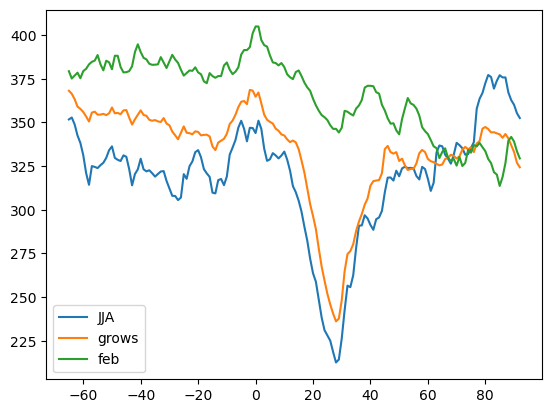

In [39]:
plt.plot(ds1.time,ds1.mrsos.mean(dim='event'),label='JJA')
plt.plot(ds2.time,ds2.mrsos.mean(dim='event'), label='grows')
plt.plot(ds3.time,ds3.mrsos.mean(dim='event'), label='feb')
plt.legend()
plt.show()

In [42]:
ds1

<xarray.Dataset>
Dimensions:  (time: 158, event: 10)
Coordinates:
  * time     (time) int32 -65 -64 -63 -62 -61 -60 -59 ... 86 87 88 89 90 91 92
  * event    (event) int32 12 14 23 29 37 41 42 50 51 54
Data variables:
    mrsos    (event, time) float64 362.5 363.7 363.1 362.5 ... 349.9 350.6 348.6